In [1]:
import pandas as pd
import numpy as np

In [2]:
# we read the .tsv file and store it in a dataframe
data_train_df_taxo = pd.read_csv('/workspaces/protein_ontologies/dataset_kg/Train/train_taxonomy.tsv', sep='\t')

data_train_df_terms = pd.read_csv('/workspaces/protein_ontologies/dataset_kg/Train/train_terms.tsv', sep='\t')


In [3]:
data_train_df_terms



,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
...,...,...,...
5363858,X5L565,GO:0050649,MFO
5363859,X5L565,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


In [4]:
terms = data_train_df_terms.groupby(['aspect', 'term'])['term'].count().reset_index(name='frequency')
print(terms.groupby('aspect')['term'].nunique())

aspect
BPO    21285
CCO     2957
MFO     7224
Name: term, dtype: int64


In [5]:
terms


,aspect,term,frequency
0,BPO,GO:0000001,26
1,BPO,GO:0000002,133
2,BPO,GO:0000003,8499
3,BPO,GO:0000011,24
4,BPO,GO:0000012,16
...,...,...,...
31461,MFO,GO:2001070,12
31462,MFO,GO:2001071,2
31463,MFO,GO:2001080,1
31464,MFO,GO:2001147,2


In [6]:
terms.groupby('aspect')['term'].nunique()

aspect
BPO    21285
CCO     2957
MFO     7224
Name: term, dtype: int64

In [7]:
selection = terms.loc[(terms.aspect == aspect)]

NameError: name 'aspect' is not defined

In [8]:
selection

NameError: name 'selection' is not defined

In [9]:
MAX_LABELS = 500
fractions = (terms.groupby('aspect')['term'].nunique() / terms['term'].nunique() * MAX_LABELS).apply(round)
print(fractions)

selected_terms = set()
for aspect, number in fractions.items():
    selection = terms.loc[(terms.aspect == aspect)]
    selection = selection.nlargest(number, columns='frequency', keep='first')
    selected_terms.update(selection.term.to_list())

aspect
BPO    338
CCO     47
MFO    115
Name: term, dtype: int64


In [10]:
def assign_labels(annotations, selected_terms=selected_terms):
    
    intersection = selected_terms.intersection(annotations)
    labels = np.isin(np.array(list(selected_terms)), np.array(list(intersection)))
    
    return list(labels.astype('int'))

annotations = data_train_df_terms.groupby('EntryID')['term'].apply(set)
labels = annotations.apply(assign_labels)

labels.head()

EntryID
A0A009IHW8    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
A0A021WW32    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
A0A021WZA4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
A0A023FBW4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
A0A023FBW7    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: term, dtype: object

In [14]:
labels.iloc[0]

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [8]:
import obonet
url = "/workspaces/protein_ontologies/dataset_kg/Train/go-basic.obo"
graph = obonet.read_obo(url)

KeyboardInterrupt: 

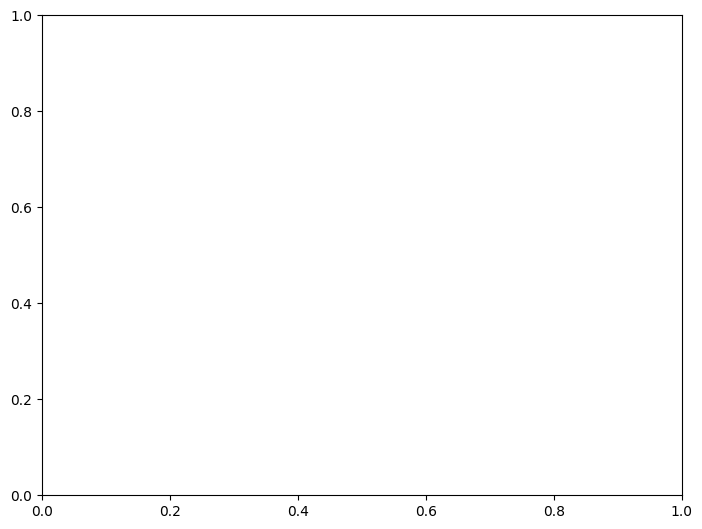

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# plot the graph
nx.draw(graph, with_labels=False, node_size=1)



In [2]:
from Bio import SeqIO

In [3]:
with open("/workspaces/protein_ontologies/dataset_kg/Train/train_sequences.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        print(record.id)

P20536
O73864
O95231
A0A0B4J1F4
P54366
P33681
P77596
Q16787
Q59VP0
P13508
Q96S79
Q9VSA3
O94652
P35669
Q5MNZ6
Q9ET09
E7EZG2
Q7ZT11
Q96C12
P05179
P41216
Q9VX31
P04632
P04021
Q86KP5
O75908
P82343
P85298
P06846
O48573
Q10MX2
P08553
Q6ENB0
P08593
Q8I9B4
Q8R3L8
Q41931
Q8L8Z8
O14277
P69913
P43688
Q02338
F4JUL9
P0A6L0
D3ZEF4
Q9BTE1
Q8IWZ5
P36554
F4IAT2
Q6DUW9
Q9CQG9
P07199
P63096
P04911
Q9JI93
Q9W328
Q9R172
Q6B959
Q9DG12
P16615
Q02887
Q8ILW9
P0DM85
O13867
Q80ZG2
P78329
Q8K4I3
Q9GZQ8
Q9NQS1
A0A1Z2R986
Q8R4S0
Q5T8D3
Q9FJW4
Q8JZZ0
P32489
Q9NZH8
Q5QGZ8
P47863
Q9NS68
Q9Z108
P77366
Q8NFU3
Q8S9L6
Q9Y2K2
Q8NF86
A2ACG1
Q7SY54
P91454
O76745
Q9LPW0
Q9JJG9
Q6P9Q6
Q6AZY7
P77044
Q1EBV7
A0A193H396
P57075
O22779
P57790
Q9Z288
P0C8Q8
P42752
P13982
Q07699
Q96EY9
P13236
Q12415
Q3E8Y7
P00358
Q54WU6
O14313
O74767
Q9DBH5
Q9VCC0
P01096
Q8BUN5
P29017
Q03337
P07582
Q96R06
P39994
Q9Z0X4
O54943
O50456
Q6NPT7
Q9UKR3
P13231
Q6P2D0
Q6S001
Q52T38
Q01249
P98175
P29276
Q4QAU9
Q8IYX1
P33136
P25090
Q3UZZ6
Q5AIA1
Q9M1B4
P31385
Q

In [4]:
record

SeqRecord(seq=Seq('HCISSLKLTAFFKRSFLLSPEKHLVLLRDGRTLIGFLRSIDQFANLVLHQTVER...DEY'), id='A0A8I6GHU0', name='A0A8I6GHU0', description='A0A8I6GHU0 tr|A0A8I6GHU0|A0A8I6GHU0_RAT U6 snRNA-associated Sm-like protein LSm1 OS=Rattus norvegicus OX=10116 GN=Lsm1 PE=3 SV=1', dbxrefs=[])